In [5]:
import pandas as pd
import dataframe_image as dfi

# Sample data
data = {
    'PCP': ['PCP 1', 'PCP 2', 'PCP 3','PCP 1', 'PCP 2', 'PCP 3'],
    'Gaps Identified': [100, 150, 200,100,240,190],
    'Gaps Closed': [80, 90, 50,80, 90, 50],
    'Gaps Closed %': [80.0, 60.0, 25.0,80.0, 60.0, 25.0],
    'Gaps Open': [20, 60, 150,20, 60, 150],
    'Gaps Open %': [20.0, 40.0, 75.0,20.0, 40.0, 75.0],
    'Status': ['Satisfactory', 'Poor', 'Poor','Excellent', 'Satisfactory','Excellent']
}

df = pd.DataFrame(data)

# Define color mapping for the Status column
status_colors = {
    'Excellent': 'background-color: #002850; color: white;',
    'Satisfactory': 'background-color: #92d5e6; color: black;',
    'Poor': 'background-color: #d3f6db; color: black;'
}

# Function to apply the color mapping
def status_color(status):
    return status_colors.get(status, '')

# Apply the styling
styled_df = df.style.applymap(status_color, subset=['Status'])

# Display the styled DataFrame in a Jupyter notebook (optional)
# If running in a script, you can remove this line
# styled_df

# To export the styled DataFrame to an Excel file with the formatting:
styled_df.export_png('df_styled.png')


## Table 2

In [14]:
df = pd.DataFrame({'PCP Name': ['REYNOSO, LUIS A',
  'MALDONADO, JUAN A',
  'PETERS, JASON E',
  'TORKILDSEN, WILLIAM H',
  'LOZANO, DIANA H'],
 'Gaps Identified': [309, 178, 163, 129, 78],
 'Gaps Closed': [193, 115, 61, 37, 47],
 '% Gaps Closed': [0.62, 0.65, 0.37, 0.29, 0.6],
 'Gaps Open': [116, 63, 102, 92, 31],
 'Status': ['Excellent', 'Satisfactory', 'Poor', 'Poor', 'Excellent']} )



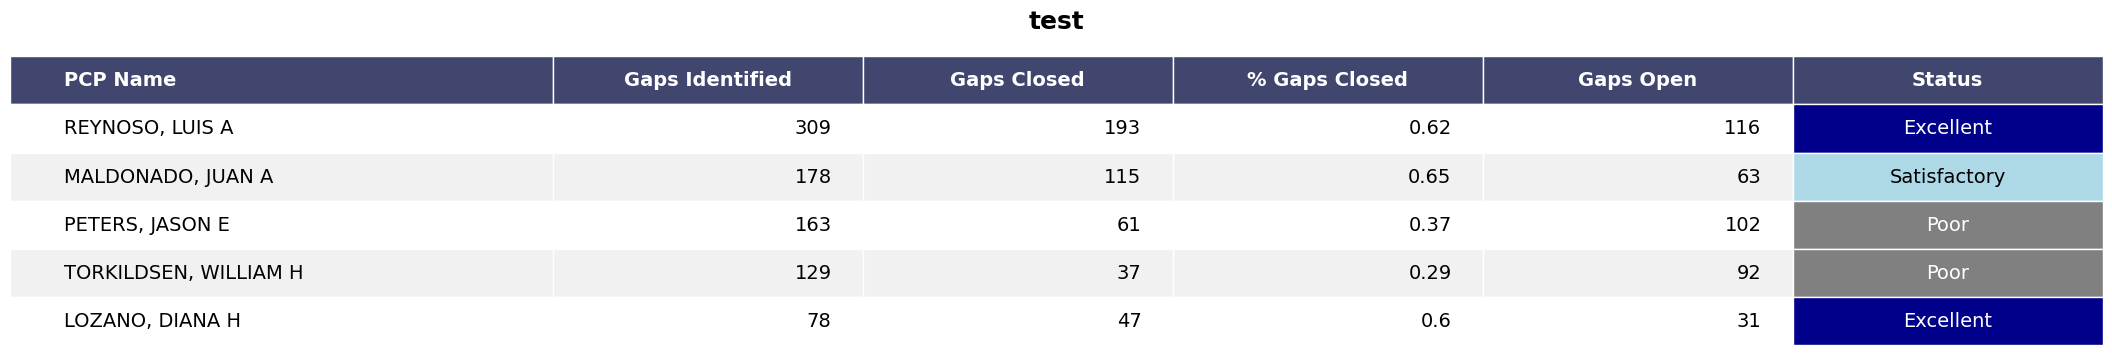

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w'
                     , title=None, bbox=[0, 0, 1, 1], header_columns=0,fst_col_width=5,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        size[0] += fst_col_width - col_width  # Adjust width for PCP column

        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    # Color mapping for the Status column
    status_colors = {
        'Excellent': '#00008B',  # Dark Blue
        'Satisfactory': '#ADD8E6',  # Light Blue
        'Poor': '#808080'  # Grey
    }

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
            # Align header of the first column to the left
            if k[1] == 0:
                cell.set_text_props(ha='left')
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])
            # Align first column to the left
            if k[1] == 0:
                cell.set_text_props(ha='left')
            # Apply color formatting to the last column (Status)
            if k[1] == len(data.columns) - 1:
                cell.set_text_props(ha='center')
                cell_value = cell.get_text().get_text()
                cell.set_facecolor(status_colors.get(cell_value, 'w'))
                cell.set_text_props(color='white' if cell_value in ['Excellent','Poor'] else 'black')

     # Set PCP Name column width by adjusting the individual cells
    for k, cell in six.iteritems(mpl_table._cells):
        if k[1] == 0:  # First column (PCP Name)
            cell.set_width(fst_col_width / size[0])
        else:  # Other columns
            cell.set_width(col_width / size[0])

    # Add title if specified
    if title:
        ax.set_title(title, fontdict={'fontsize': font_size + 4, 'fontweight': 'bold'}, pad=20)

    return ax
    

def get_table(ax):
    table = None
    for child in ax.get_children():
        if isinstance(child, mpl.table.Table):
            table = child
            return table
    return table

# Render the table
ax = render_mpl_table(df, header_columns=0, col_width=4, title='test', fst_col_width=7)

plt.show()


UnboundLocalError: cannot access local variable 'size' where it is not associated with a value

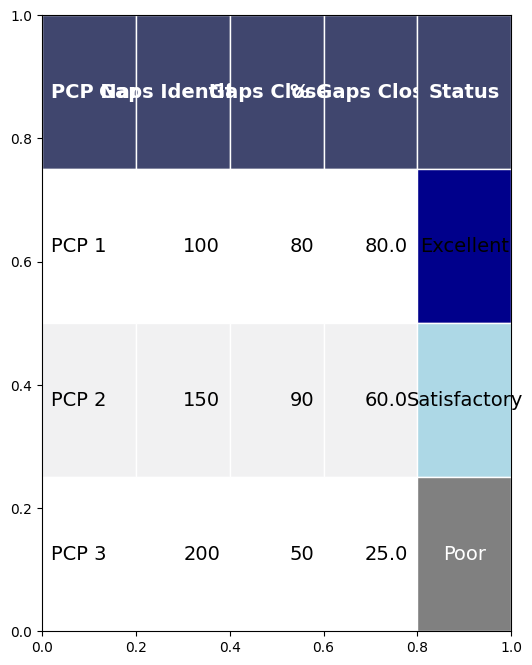

In [25]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0, title=None, pcp_col_width=5.0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        size[0] += pcp_col_width - col_width  # Adjust width for PCP column
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    # Color mapping for the Status column
    status_colors = {
        'Excellent': '#00008B',  # Dark Blue
        'Satisfactory': '#ADD8E6',  # Light Blue
        'Poor': '#808080'  # Grey
    }

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
            # Align PCP Name header to the left
            if k[1] == 0:
                cell.set_text_props(ha='left')
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])
            # Align first column to the left
            if k[1] == 0:
                cell.set_text_props(ha='left')
            # Apply color formatting to the last column (Status) and center align
            if k[1] == len(data.columns) - 1:
                cell_value = cell.get_text().get_text()
                cell.set_facecolor(status_colors.get(cell_value, 'w'))
                cell.set_text_props(color='white' if cell_value == 'Poor' else 'black', ha='center')

    # Set PCP Name column width by adjusting the individual cells
    for k, cell in six.iteritems(mpl_table._cells):
        if k[1] == 0:  # First column (PCP Name)
            cell.set_width(pcp_col_width / size[0])
        else:  # Other columns
            cell.set_width(col_width / size[0])

    # Add title if specified
    if title:
        ax.set_title(title, fontdict={'fontsize': font_size + 4, 'fontweight': 'bold'}, pad=20)

    return ax

def get_table(ax):
    table = None
    for child in ax.get_children():
        if isinstance(child, mpl.table.Table):
            table = child
            return table
    return table

# Sample DataFrame
import pandas as pd

data_table = {
    'PCP Name': ['PCP 1', 'PCP 2', 'PCP 3'],
    'Gaps Identified': [100, 150, 200],
    'Gaps Closed': [80, 90, 50],
    '% Gaps Closed': [80.0, 60.0, 25.0],
    'Status': ['Excellent', 'Satisfactory', 'Poor']
}
df_tot = pd.DataFrame(data_table)

# Sample data for the line chart
data_chart = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    '2022': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650],
    '2023': [110, 160, 210, 260, 310, 360, 410, 460, 510, None, None, None]
}
df_chart = pd.DataFrame(data_chart)

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

# Render the table
ax0 = plt.subplot(gs[0])
render_mpl_table(df_tot, header_columns=0, col_width=4, title='Performance Summary', pcp_col_width=5, ax=ax0)

# Plot the line chart
ax1 = plt.subplot(gs[1])
ax1.plot(df_chart['Month'], df_chart['2022'], label='2022', marker='o', color='b')
ax1.plot(df_chart['Month'], df_chart['2023'], label='2023', marker='o', color='r')
ax1.axhline(y=85, color='orange', linestyle='--', label='Threshold 85')
ax1.axhline(y=93, color='yellow', linestyle='--', label='Threshold 93')
ax1.set_xlabel('Month')
ax1.set_ylabel('Values')
ax1.set_title('Monthly Values for 2022 and 2023')
ax1.legend()

plt.tight_layout()
plt.show()
